In [3]:
%autosave 180

Autosaving every 180 seconds


In [63]:
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns


#Numpy
import numpy as np

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

## Base de dados
A base de dados se refere a certas características. Com elas, é possível verificar do que é consituido um bom vinho.

In [5]:
df = pd.read_csv('winequality-red.csv')

In [6]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Os valores possíveis para a qualidade do vinho são dados abaixo, sendo eles:

In [10]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Antes de analisar os modelos de predição, vale a pena observar a presentação t-SNE e ver como os dados se distribuem num espaço vetorial de 2D.

Como pode ser visto, a região de distribuição da qualidade de vinhos se sobrepõem bastante. Com isso, vale a pena explorar melhor, com esse gráfico, os features determinantes para descobrir a qualidade do vinho.

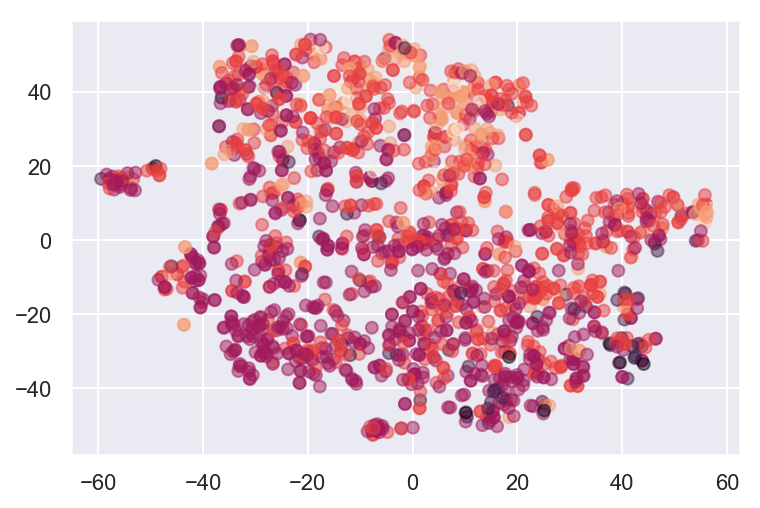

In [9]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Separanado apenas as colunas de features
x_df = df.drop(['quality'], axis=1)

# Normalização dos dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_df)

# Construção dos dados t-SNE
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(x_scaled)


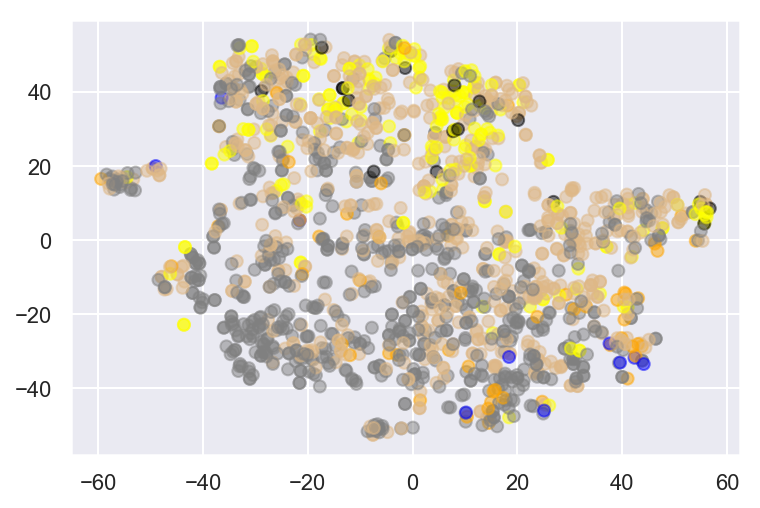

In [19]:
# plot da representação t-SNE
colors = {3:'blue', 4:'orange',5:'gray', 6:'burlywood', 7:'yellow', 8:'black'}
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df['quality'].map(colors), alpha=.5)

## Pair plot
A figura abaixo representa os gráfico de comparação entre os features. Vale notar, que nessa base de dados, todos são dados numéricos.

Como pode ser visto, nem todos os features tem uma distribuição normal, no caso, apenas as clunas *pH* e *density* apresentam uma distribuição normal.

Nesse plot não houve muito informação a ser adquirida. Dessa forma, o estudo será continuado com os métodos de aprendizado de máquina, começando com regressão linear

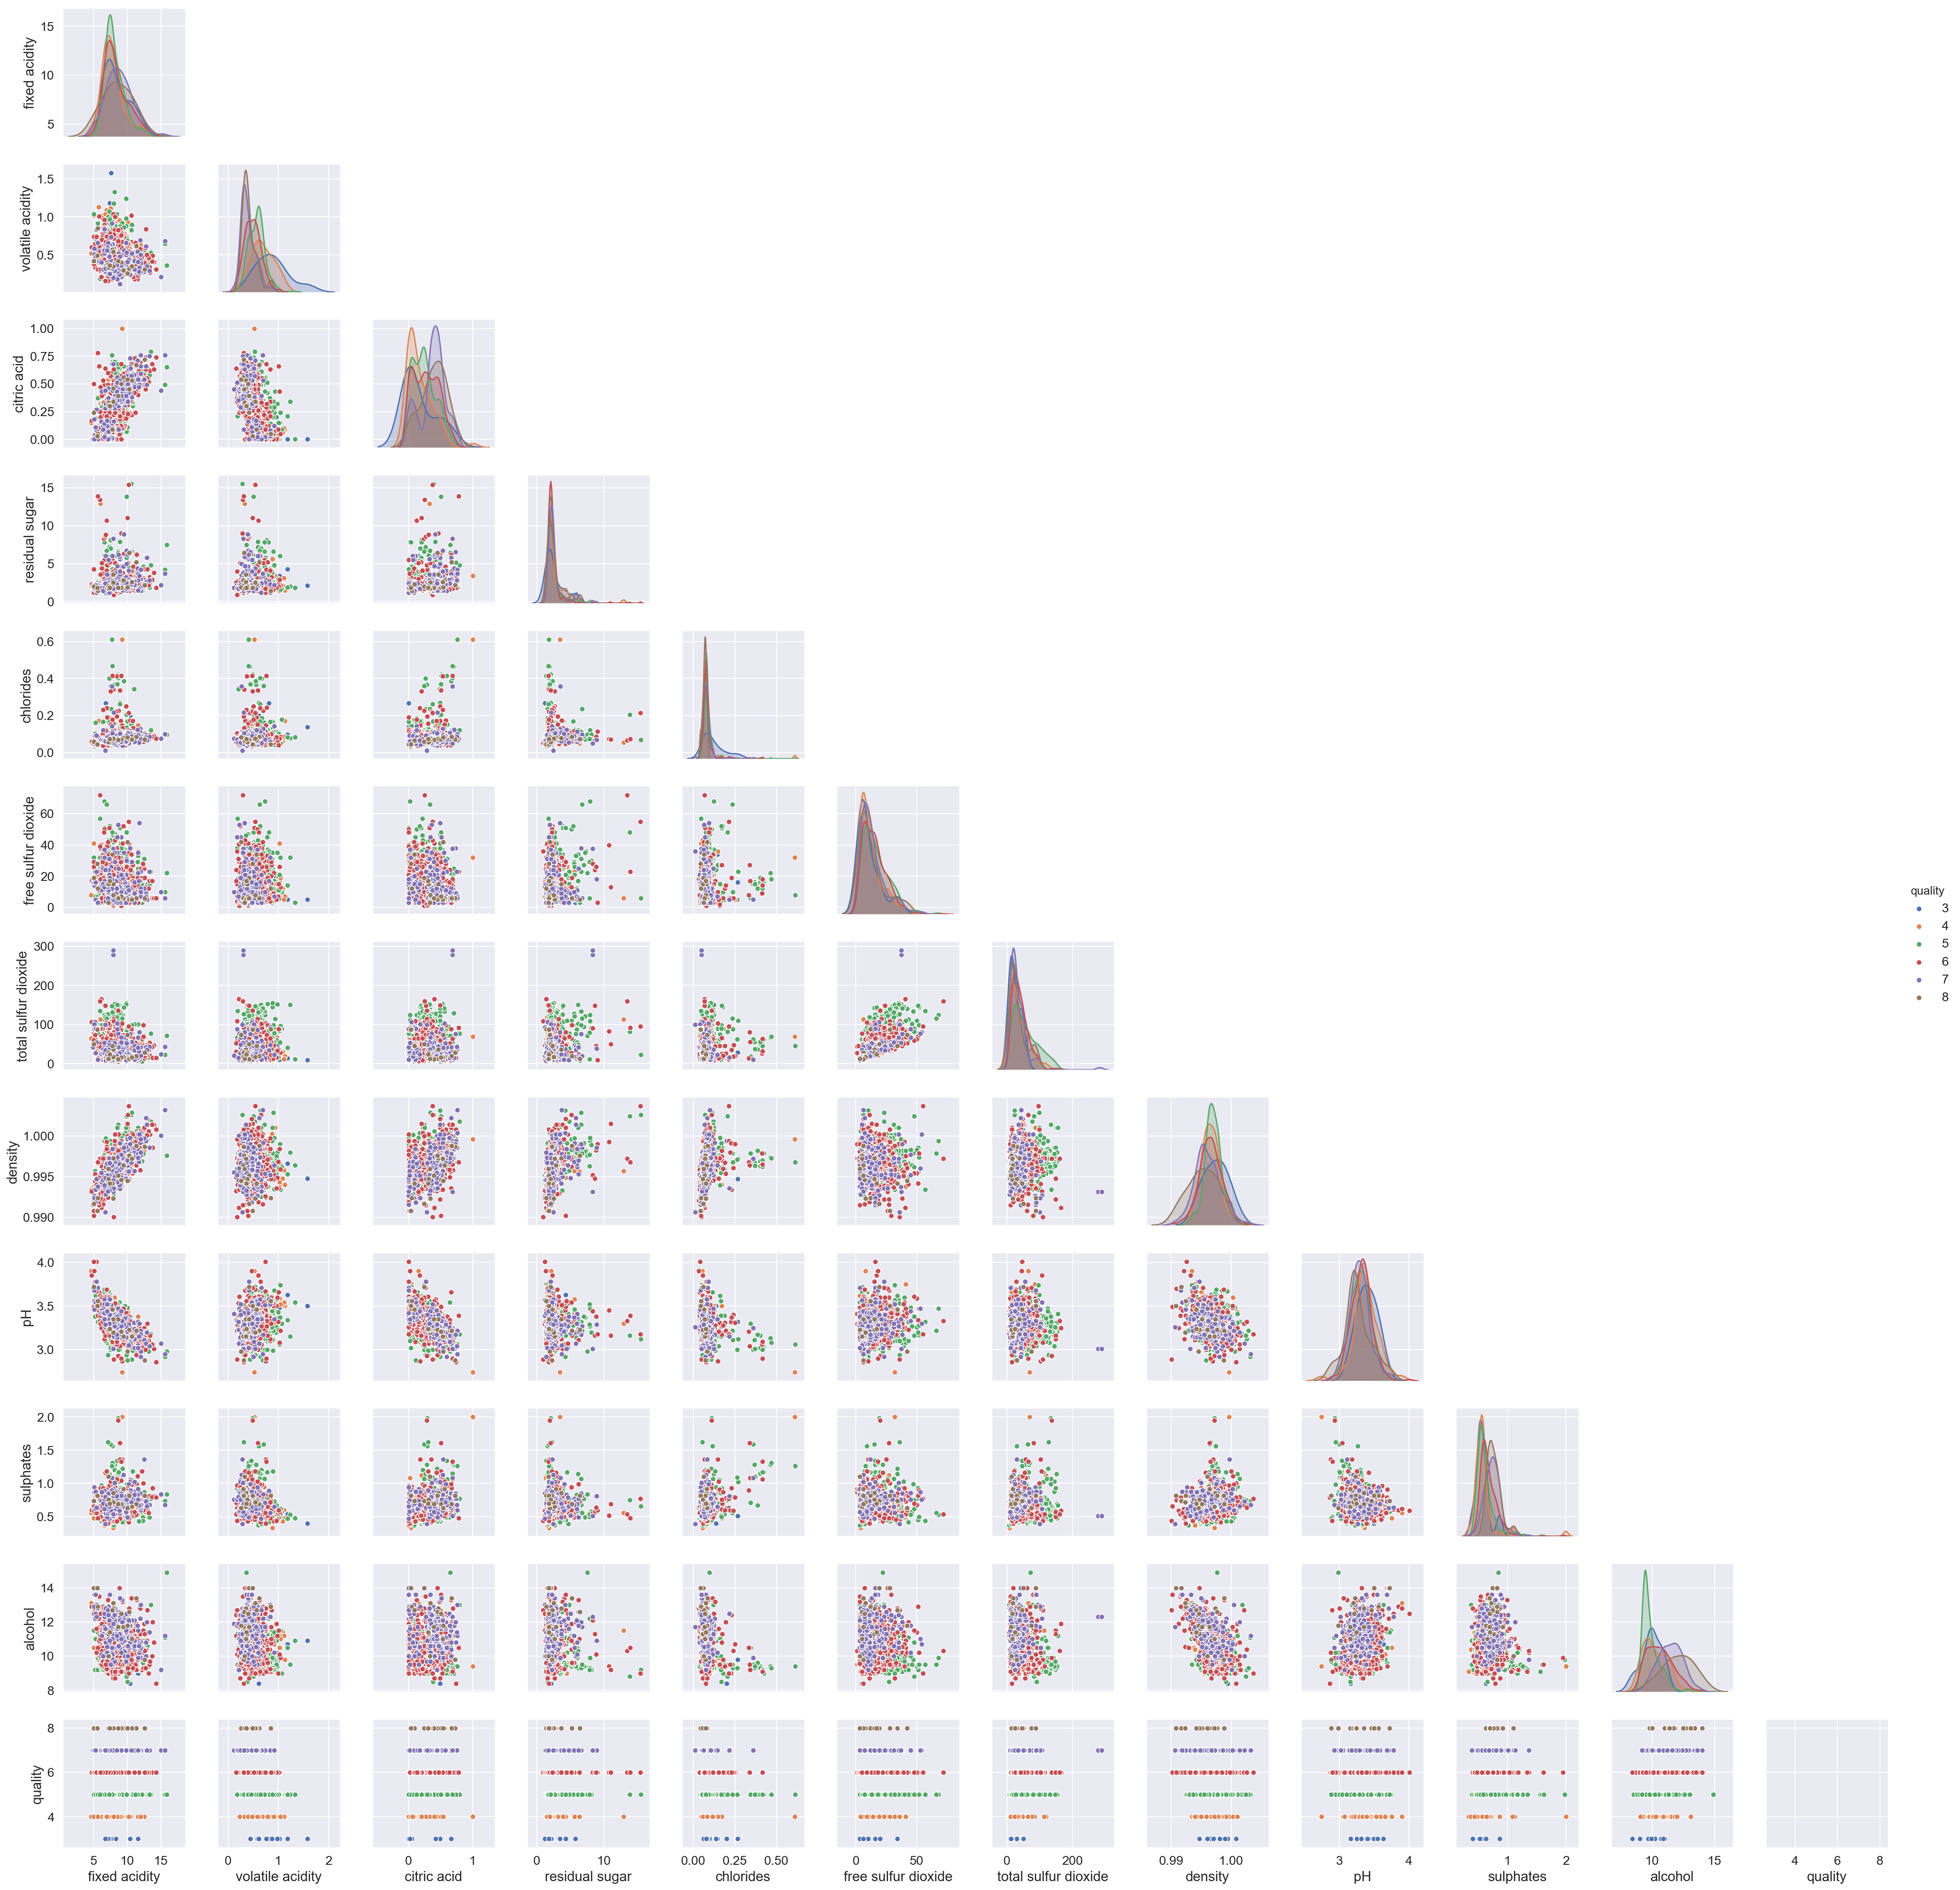

In [25]:
def hide_current_axis(*args, **kwds):
    """
    Função que esconde os gráficos
    """
    plt.gca().set_visible(False)
    
sns.set(font_scale=1.3)
g = sns.pairplot(df, hue='quality')
plt.legend(loc='best', fontsize='large')
g.map_upper(hide_current_axis)


## Regressão linear
Primeiramente, a qualidade do vinha tentará ser prevista utilizando regressão linear. Dessa forma, a correlação entre os features pode ser observada.

A escolha de quais parâmetros podem ser usados na regressão linear, precisam que eles seja independentes entre si. Como pode ser visto, a maioria das colunas apresentam uma baixa correlação linear.

Observando a qualidade, que é o objetivo do estudo, ela apresenta uma correlação maior com *alcohol*, algo em torno de $0.48$.

De antemão, pode ser inferdio, a baixa qalidade de previsão desse modelo linear, até por ser um problema de classificação, contudo os resultados serão gerados e comparados com os outros métodos.

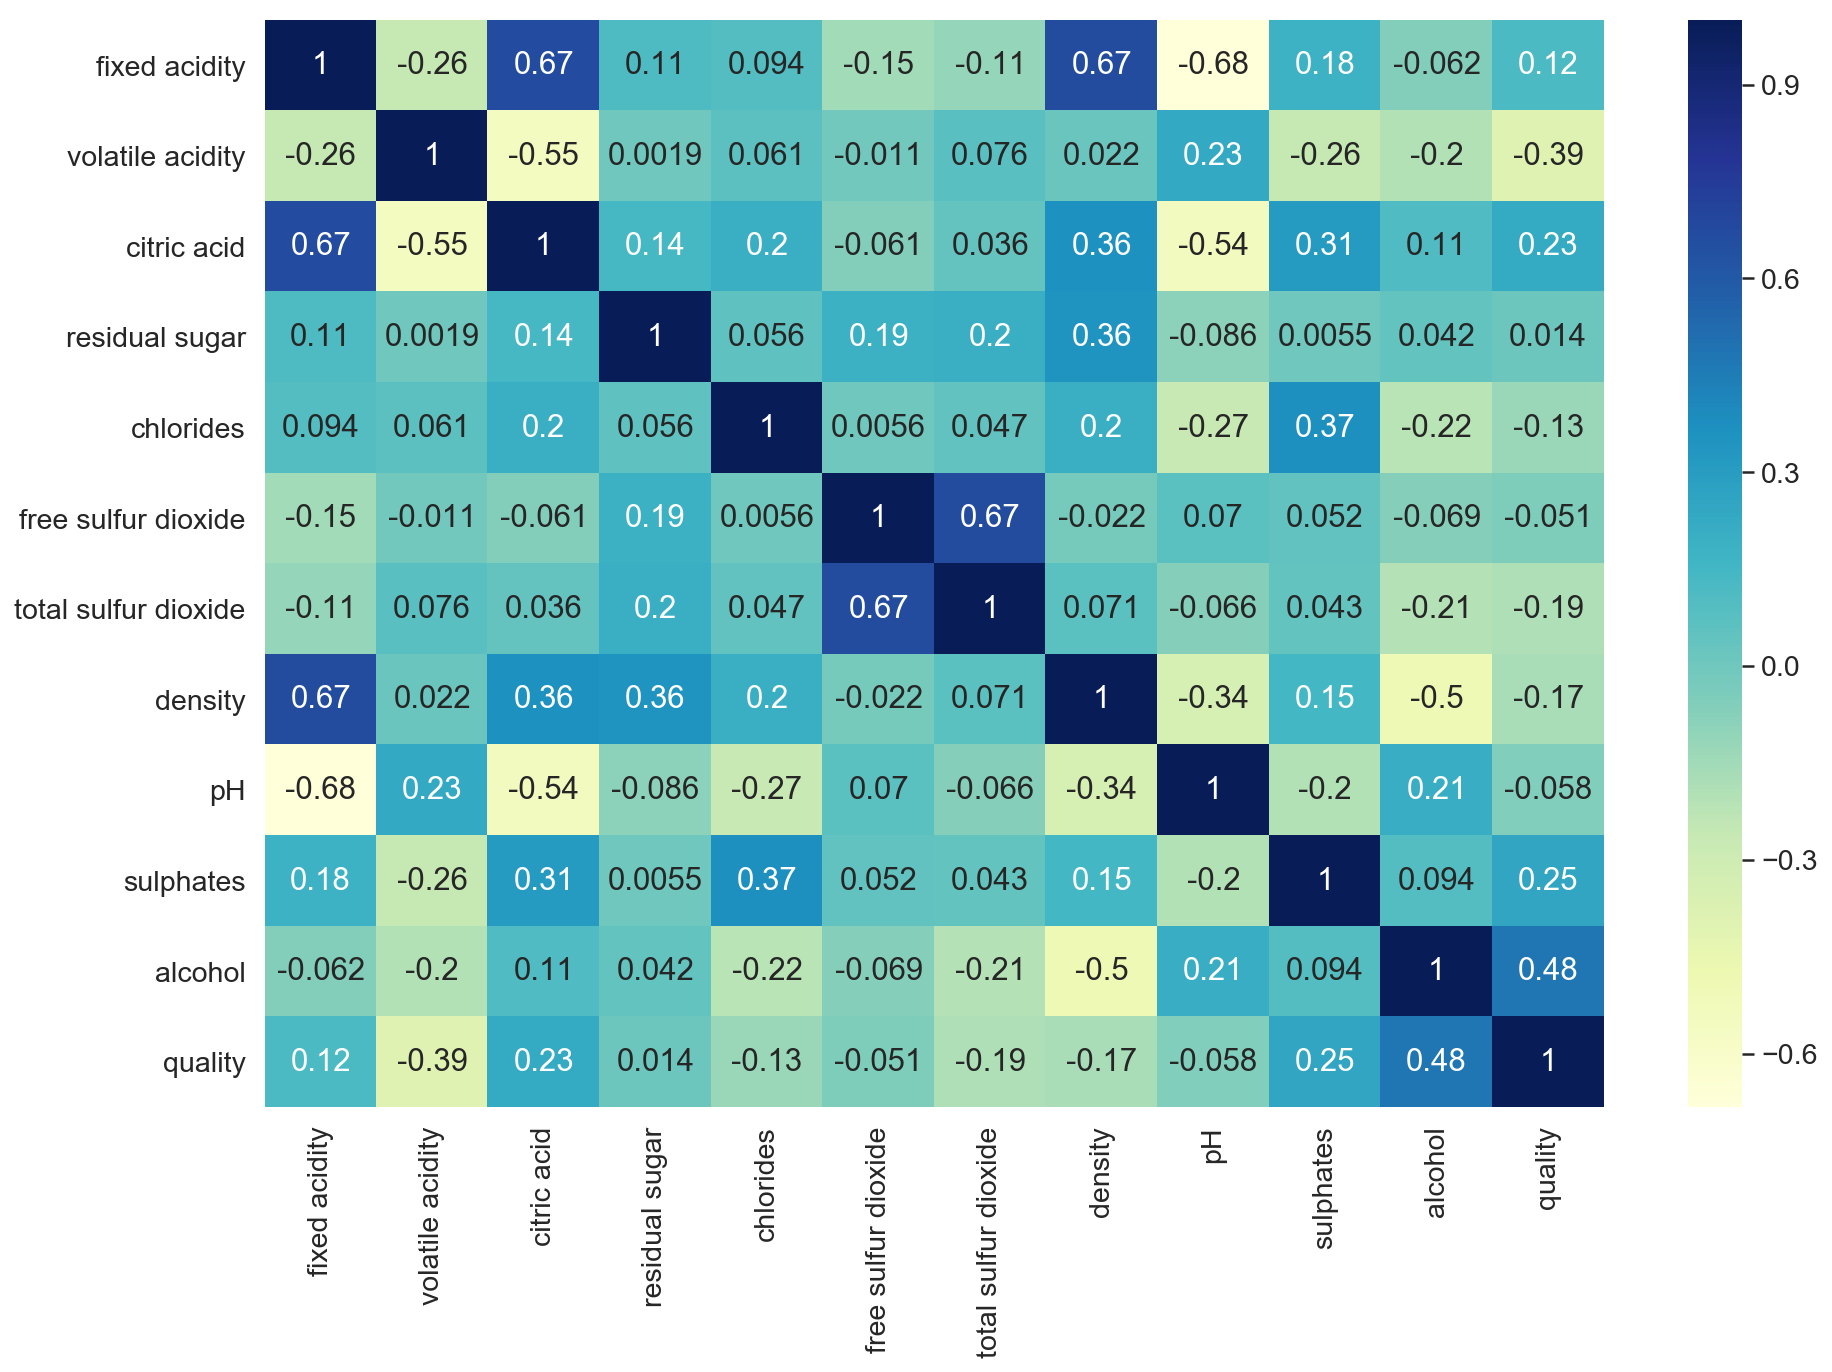

In [27]:
plt.subplots(figsize=(15,10))
g = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,)


Primeiramente, serão separado o *dataset* entre o de treinamento e o de validação, utilizando as bibliotecas de interesse. 

Para esse estudo, $20\%$ da base de dados será utilizado para validação.

In [37]:
# Bibliotecas de interesssepara regressão linear
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(x_df, df['quality'].values, test_size=0.20, random_state=0)

In [ ]:
Como é um problema de regressão multivariada, abaixo segue o coeficiente de para cada feature

In [38]:
# Treinamento e aplicação do modelo
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

coeff_df = pd.DataFrame(lm.coef_, x_df.columns, columns=['Coefficient'])  
coeff_df

Coefficient
fixed acidity            0.041284
volatile acidity        -1.149528
citric acid             -0.177927
residual sugar           0.027870
chlorides               -1.873407
free sulfur dioxide      0.002684
total sulfur dioxide    -0.002777
density                -31.516666
pH                      -0.254486
sulphates                0.924040
alcohol                  0.267797

O MSE apresentado pelo modelo foi de $0.38$, além disso, o gráfico de scatter pode ser utilizado para ver como ficou a dispersão dos dados. 

Como esperado, o resultado pode ser melhorado, até porque, como visto durante a fase de pré processamento, os features não tinham uma relação lienar clara com o objetivo: qualidade.

Com isso, a próxima etapa será analisar o modelo de regressão logística, mais indicado para problemas de classificação.

MSE: 0.38


Text(0, 0.5, 'Valores de teste')

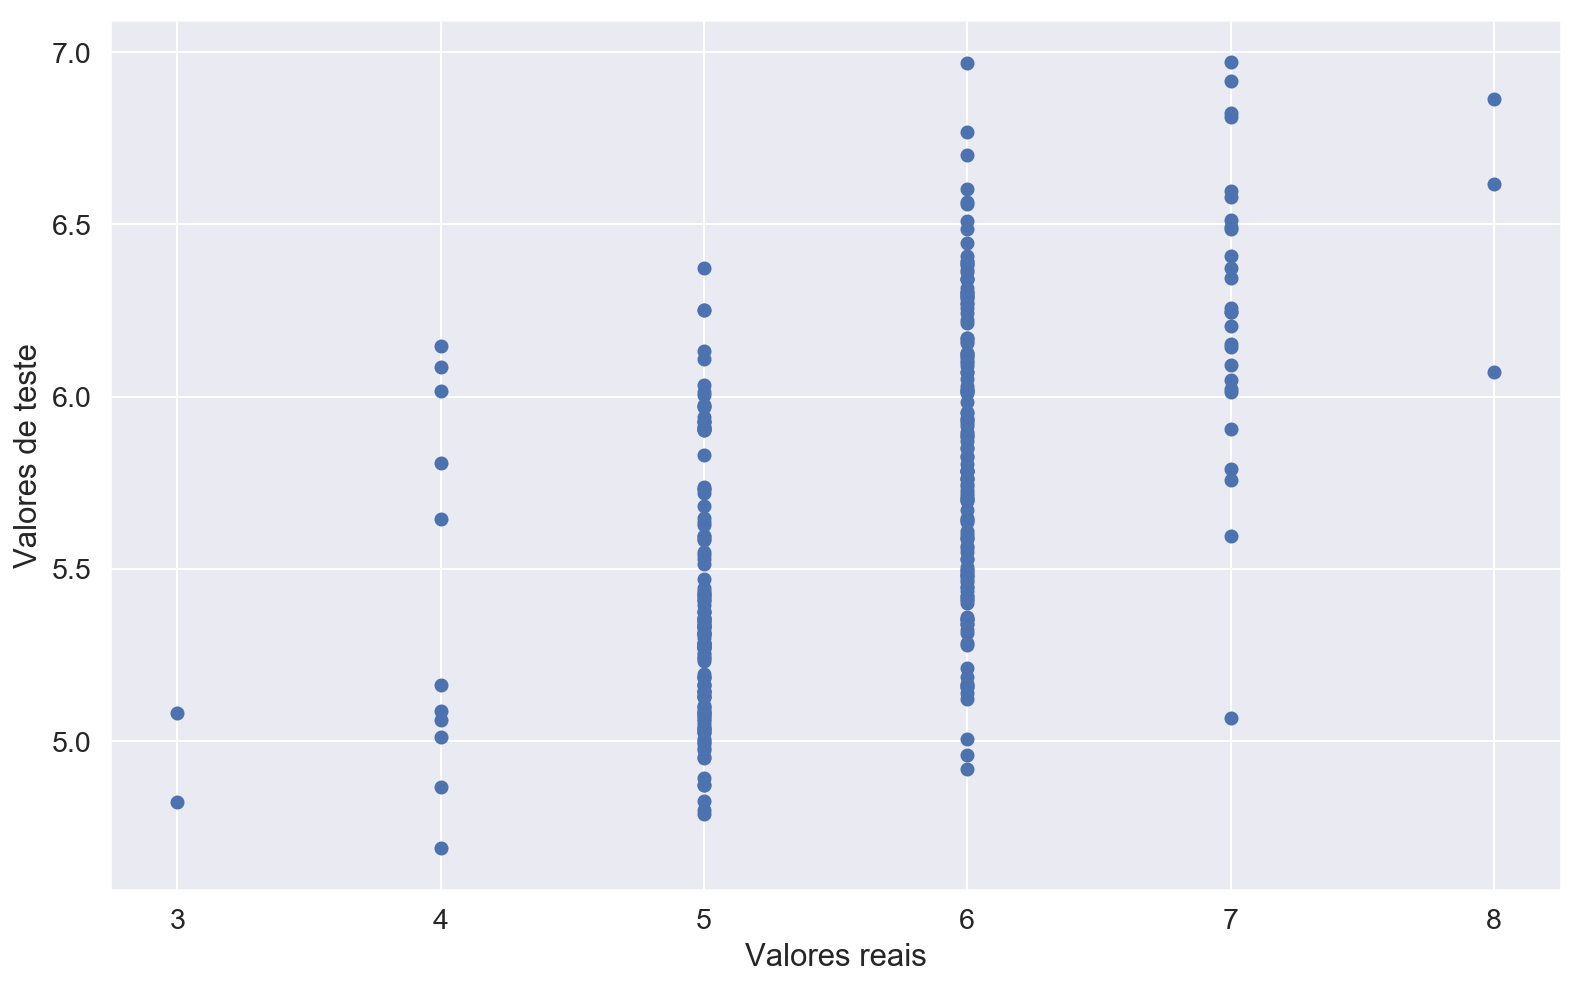

In [47]:
pont = round(mean_squared_error(y_test, predictions), 2)
print(f'MSE: {pont}')

plt.figure(figsize=(13, 8))
plt.scatter(y_test, predictions)
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')



## Regressão logística

Agora, a mesma base de dados será submetida para um modelo de regressão por meio da equação sigmoid.

In [59]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# Construção do modelo
C = 1
logit = LogisticRegression(C=C, random_state=17)

model = logit.fit(x_train, y_train)
predictions = model.predict(x_test)

print(f"Accuracy do treinamento:{round(logit.score(x_test, y_test), 3)*100} %")

Accuracy do treinamento:62.8 %


Como pode ser visto acima, o modelo nãoteve um bom desempenho, dessa forma, o modelo tentará ser calibrado por meio do parâmtro $C$.

Obsevando os resultados, percebe-se que a calibração de $C$ não altera profundamente os resultados, por mais que se tenha um valor de ótimo. Portanto, a utilização de outro modelo de classificação é o mais indicado para melhorar os resultados

In [80]:
def c_calibration(C):
    logit = LogisticRegression(C=C, random_state=17)
    model = logit.fit(x_train, y_train)
    predictions = model.predict(x_test)
    acerto = logit.score(x_test, y_test)*100
    
    return acerto

C = np.linspace(1, 100, 100)
acc = []

for i in C:
    acc.append(c_calibration(i))
     

Text(0, 0.5, 'Accuracy')

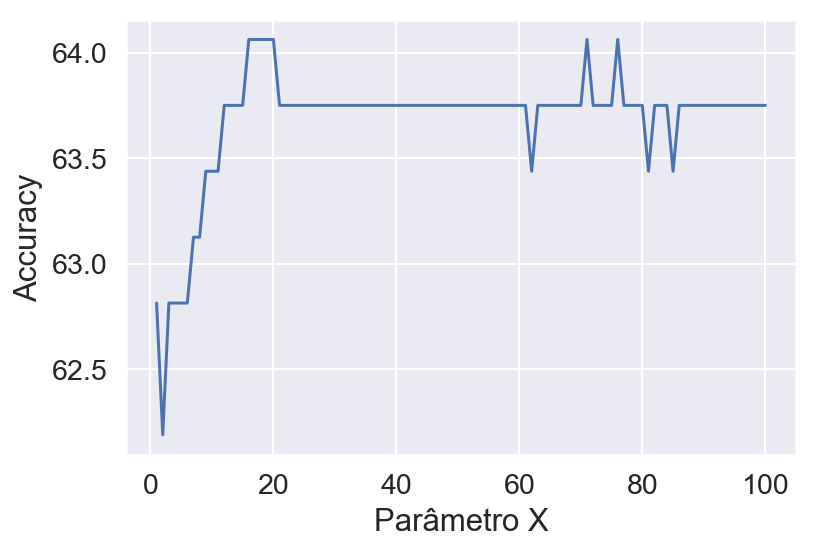

In [81]:
plt.plot(C, acc)
plt.xlabel('Parâmetro X')
plt.ylabel('Accuracy')